# TODO
Specialized gradient visualizations:
* How much of the visualizations should be on tensorboard? some seem better for a simple graph (just training / val loss), but for a lot of things it seems useful to look at the gradients of all layers. If these cases can be seperated easily maybe do your own graphs, otherwise tensorboard all the way.

# Debugging CNNs
* Here we focus on: **Debuging model / training procedure / gradients**
* References:
1. https://karpathy.github.io/2019/04/25/recipe/
2. https://stats.stackexchange.com/questions/352036/what-should-i-do-when-my-neural-network-doesnt-learn
3. https://medium.com/@keeper6928/how-to-unit-test-machine-learning-code-57cf6fd81765
4. https://github.com/suriyadeepan/torchtest/

## Process of making a good CNN:
### Understanding the problem
* The optimal model for a given problem is dataset dependent (need large or local context? Is Global Average Pooling ok?)
* Everything is dataset specific when trying to make a really good model
* **Missing Dataset Exploration**: For this we are debugging architectures, not particular approaches to a certain dataset. For this reason stick with CIFAR10, as the smallest dataset that still looks like other image recgonition problems.

### End to end training + dumb baselines
We need to know how the model should perform first.
**Baselines**: Super simple ones. Without data augmentation. Fixed random seed.
1. Linear Model
2. Fully Connected Conv Net (3 layers)
3. CNN (3 layers -> GAP -> FC)
4. ResNet50

### Debuging model / training procedure
* Overfit a small batch to see if model is working
* Make sure aren't mixing channels accidentally
* More advanced gradient debugging (e.g. something like figuring out if a sigmoid is stopping your gradient, etc.)

### Making a good model:
1. Make a model large enough to overfit your training set
2. Gradually add some kind of regularization till it gets better. (more data, dropout, early stopping, more data augmentation)
3. Tune hyperparameters
4. Ensembles / training for longer


In [25]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
import torchvision.transforms as transforms

sys.path.append(str(Path.cwd().parent))
from utils.unit_tests import Tester

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [22]:
model = SimpleNet()
# loss_fn = torch.nn.CrossEntropyLoss()#reduction=False)
# train_loader, val_loader = tester.get_cifar_loaders(bs=32)

In [23]:
tester = Tester(model)
tester.print_non_trainable_params()
tester.check_correct_params_updated()

Files already downloaded and verified
Files already downloaded and verified


Files already downloaded and verified
Files already downloaded and verified
Gradient for the correct inputs only
Using CIFAR10 dataloader with bs=10 for overfitting
Files already downloaded and verified
Files already downloaded and verified


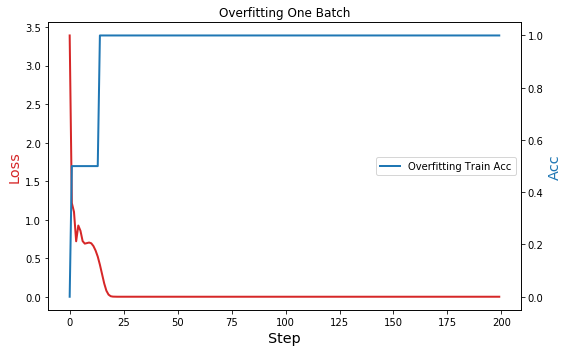

In [24]:
tester.check_batch_gradients_mixed()
tester.overfit_one_batch()

In [61]:
for name, param in model.named_parameters():
    print(name)

conv1.weight
conv1.bias
conv2.weight
conv2.bias
conv3.weight
conv3.bias
conv4.weight
conv4.bias
fc.weight
fc.bias
